In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep = ',')

df_DNP.head()

,Sector,UnidadMedidaProducto,Indicador,UnidadMedidaIndicador,Producto,Cantidad,MetaIndicador,AvanceIndicador,ValorProducto
0,Interior,Número,Asesorías técnicas realizadas Actualizadas par...,Número,Asesorías técnicas realizadas,1.0,1.0,0.0,15000000.0
1,Inclusión Social Y Reconciliación,Número de personas,Personas vinculadas a empleo formal para pobla...,Número de personas,Servicio de gestión para la colocación de empleo,40.0,40.0,80.0,50208633.0
2,Agricultura Y Desarrollo Rural,Mes,Cadenas productivas apoyadas con recursos,Mes,El proyecto garantiza la asistencia técnica e...,12.0,2.0,0.0,0.0
3,Inclusión Social Y Reconciliación,Número de beneficiarios,Beneficiarios potenciales para quienes se gest...,Número de beneficiarios,Servicio de gestión de oferta social para la p...,3000.0,3000.0,3000.0,18000000.0
4,Cultura,Número de usuarios,Usuarios,Número de usuarios,Servicios bibliotecarios,20788.0,20788.0,0.0,0.0


In [14]:
df_DNP.isnull()

,Sector,UnidadMedidaProducto,Indicador,UnidadMedidaIndicador,Producto,Cantidad,MetaIndicador,AvanceIndicador,ValorProducto
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
372026,False,False,False,False,False,False,False,False,False
372027,False,False,False,False,False,False,False,False,False
372028,False,False,False,False,False,False,False,False,False
372029,False,False,False,False,False,False,False,False,False


In [15]:
df_DNP.dtypes

Sector                    object
UnidadMedidaProducto      object
Indicador                 object
UnidadMedidaIndicador     object
Producto                  object
Cantidad                 float64
MetaIndicador            float64
AvanceIndicador          float64
ValorProducto            float64
dtype: object

In [16]:
df_DNP.Sector.unique()

array(['Interior', 'Inclusión Social Y Reconciliación',
       'Agricultura Y Desarrollo Rural', 'Cultura', 'Educación',
       'Deporte Y Recreación', 'Ambiente Y Desarrollo Sostenible',
       'Transporte', 'Vivienda Ciudad Y Territorio',
       'Gobierno Territorial', 'Salud Y Protección Social',
       'Ciencia Tecnología E Innovación', 'Planeación', 'Minas Y Energía',
       'Trabajo', 'Comercio Industria Y Turismo',
       'Presidencia De La República', 'Empleo Público',
       'Justicia Y Del Derecho', 'Información Estadística', 'Hacienda',
       'Tecnologías De La Información Y Las Comunicaciones',
       'Organismos De Control', 'Fiscalía', 'Rama Judicial',
       'Registraduría', 'Congreso De La República',
       'Relaciones Exteriores',
       'Sistema Integral De Verdad Justicia Reparación Y No Repetición'],
      dtype=object)

In [17]:
df_DNP.Sector.value_counts()

Transporte                                                        44369
Inclusión Social Y Reconciliación                                 37277
Salud Y Protección Social                                         35557
Vivienda Ciudad Y Territorio                                      35329
Educación                                                         35243
Gobierno Territorial                                              28358
Agricultura Y Desarrollo Rural                                    23933
Ambiente Y Desarrollo Sostenible                                  21367
Deporte Y Recreación                                              20572
Cultura                                                           19035
Ciencia Tecnología E Innovación                                   10780
Minas Y Energía                                                    9913
Comercio Industria Y Turismo                                       9808
Planeación                                                      

<AxesSubplot: title={'center': 'Muestra General'}, xlabel='Sectores', ylabel='Inversión DNP'>

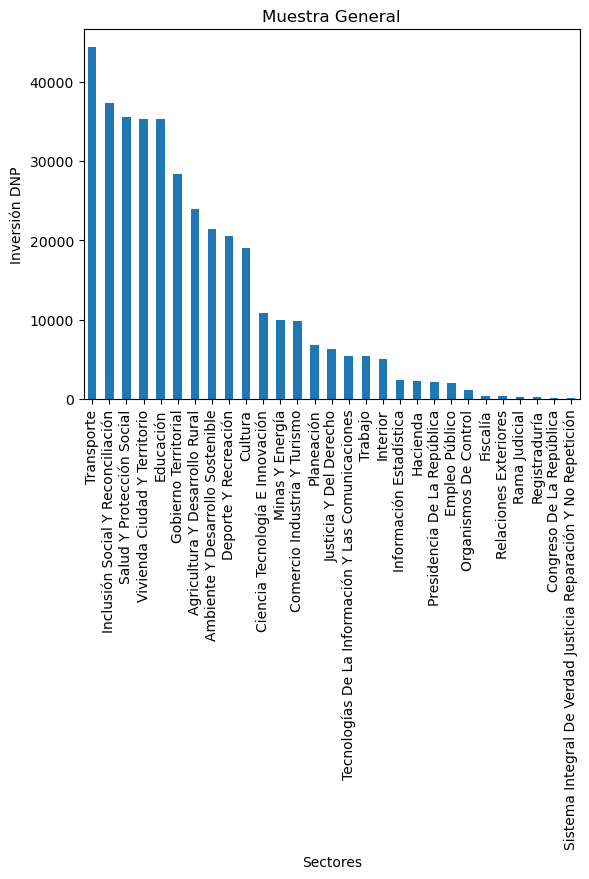

In [18]:
#Evaluaciòn poblaciòn sector, selecciona las veces que aparece cada sector único y se ordena de mayor a menor frecuencia

df_DNP['Sector'].value_counts().iloc[:29].plot(kind='bar', xlabel='Sectores', ylabel='Inversión DNP',title='Muestra General')


<AxesSubplot: title={'center': 'Selección muestreo'}, xlabel='Sectores escogidos', ylabel='Inversión DNP'>

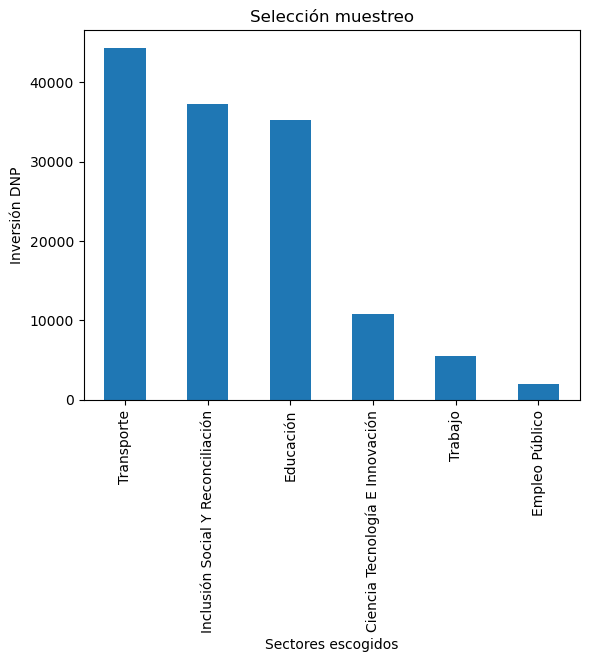

In [19]:
# crear una lista de valores únicos de la columna "Sector"
sectores = ['Transporte', 'Educación', 'Trabajo', 'Ciencia Tecnología E Innovación','Inclusión Social Y Reconciliación', 'Empleo Público']

# seleccionar solo las filas de df_DNP que contienen los valores de la lista "sectores"
df_sectores = df_DNP.loc[df_DNP['Sector'].isin(sectores)]

# trazar el gráfico de barras con los datos seleccionados
df_sectores['Sector'].value_counts().plot(kind='bar', xlabel='Sectores escogidos', ylabel='Inversión DNP', title='Selección muestreo')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Interior'),
  Text(1, 0, 'Inclusión Social Y Reconciliación'),
  Text(2, 0, 'Agricultura Y Desarrollo Rural'),
  Text(3, 0, 'Cultura'),
  Text(4, 0, 'Educación'),
  Text(5, 0, 'Deporte Y Recreación'),
  Text(6, 0, 'Ambiente Y Desarrollo Sostenible'),
  Text(7, 0, 'Transporte'),
  Text(8, 0, 'Vivienda Ciudad Y Territorio'),
  Text(9, 0, 'Gobierno Territorial'),
  Text(10, 0, 'Salud Y Protección Social'),
  Text(11, 0, 'Ciencia Tecnología E Innovación'),
  Text(12, 0, 'Planeación'),
  Text(13, 0, 'Minas Y Energía'),
  Text(14, 0, 'Trabajo'),
  Text(15, 0, 'Comercio Industria Y Turismo'),
  Text(16, 0, 'Presidencia De La República'),
  Text(17, 0, 'Empleo Público'),
  Text(18, 0, 'Justicia Y Del Derecho'),
  Text(19, 0, 'Información Estadística'),
  Text(20, 0, 'Hacienda'),
  Text(21, 0, 'Tecnologías De La Información Y Las Comunicaciones'),
 

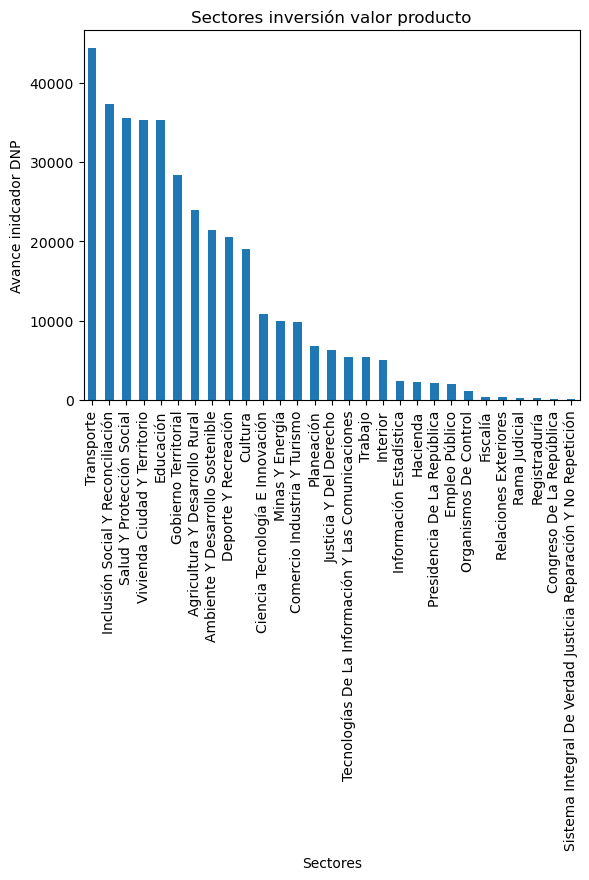

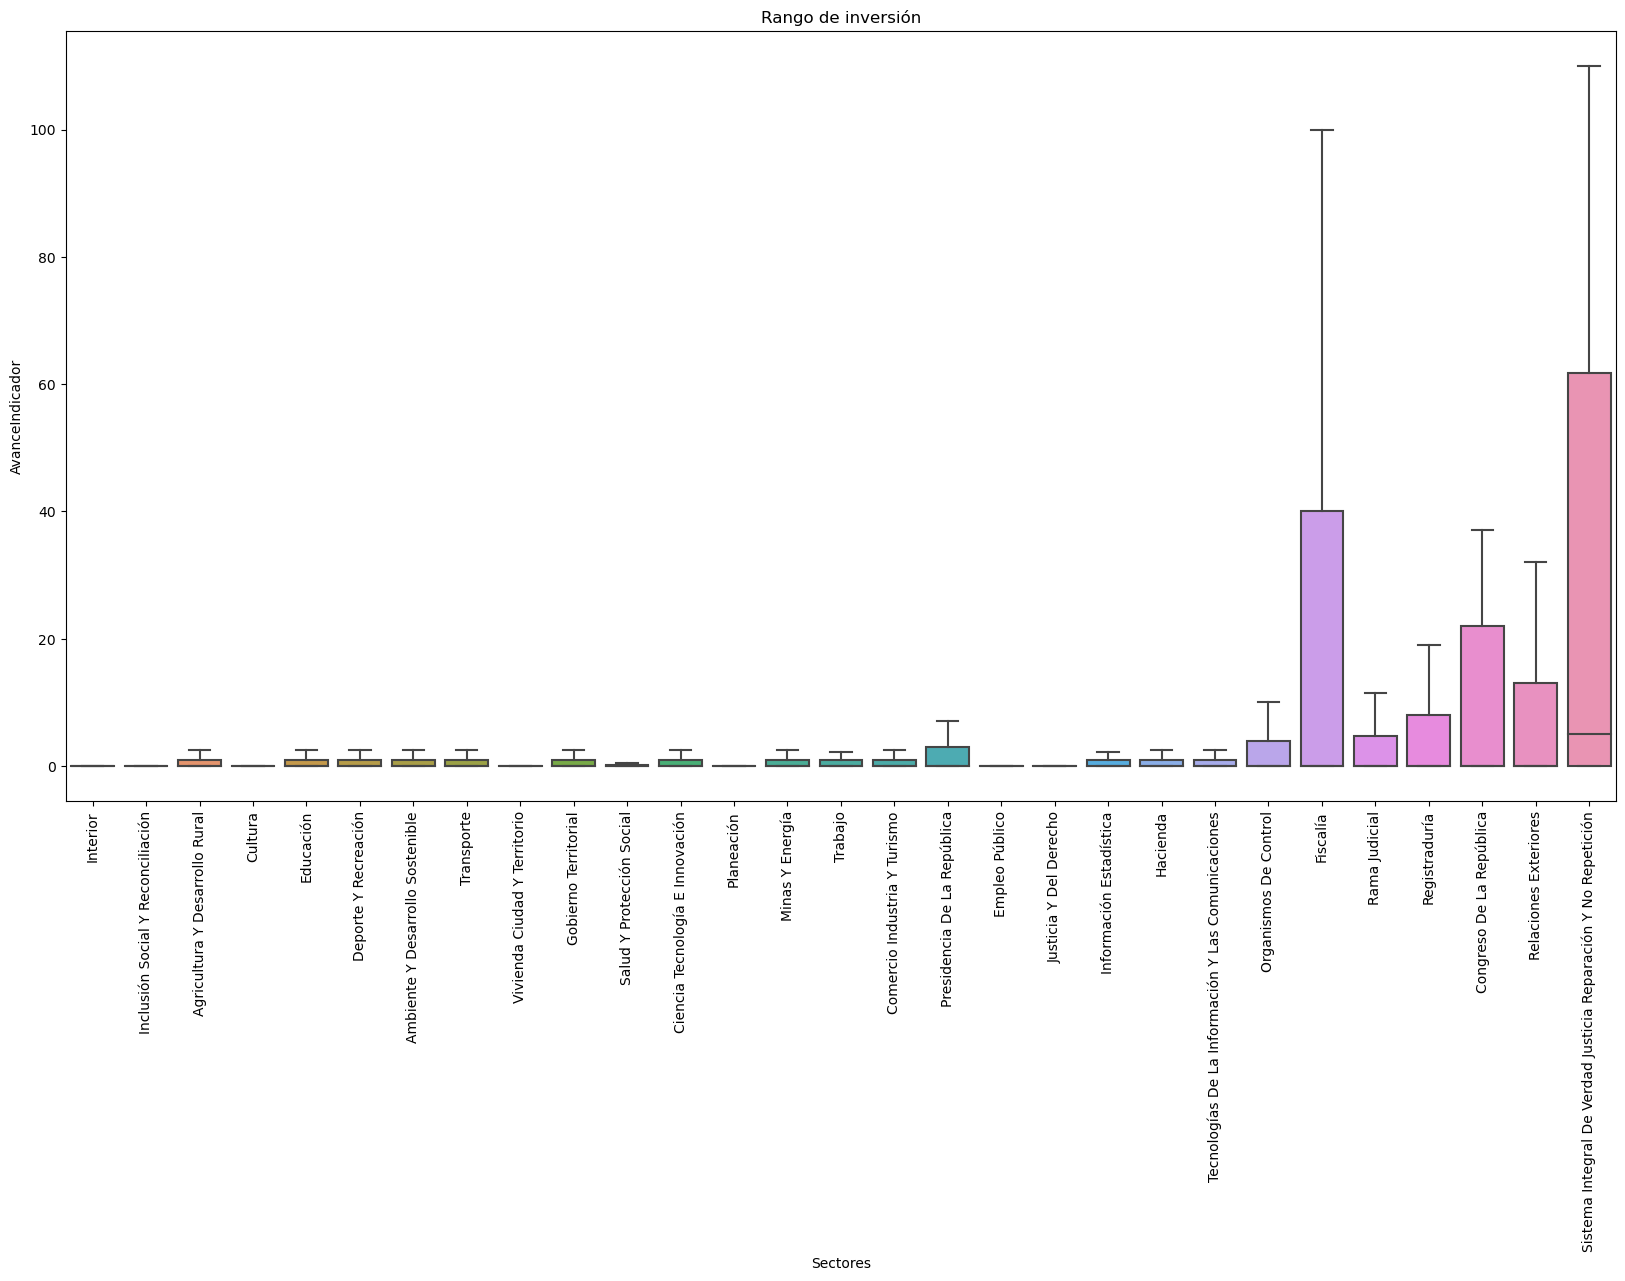

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt

df_sectores = df_DNP.loc[df_DNP['Sector'].isin(sectores)]
df_sectores_subset = df_sectores[['Sector', 'AvanceIndicador']]
df_sectores['Sector'].value_counts().plot(kind='bar', xlabel='Sectores', ylabel='Avance inidcador DNP', title='Sectores inversión valor producto')

fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='Sector', y='AvanceIndicador', data=df_sectores, ax=ax, showfliers = False)
ax.set_title('Rango de inversión')
ax.set_xlabel('Sectores')
ax.set_ylabel('AvanceIndicador')
plt.xticks(rotation=90)

#Mediante el análisis exploratorio de los datos contenidos en el conjunto de datos 'DNP-ProductoSector', pude determinar la distribución de la inversión 
#del Departamento Nacional de Planeación (DNP) en diferentes sectores de la economía colombiana. Al seleccionar un subconjunto de los sectores, pude 
#observar mediante un gráfico de caja que el rango de inversión varía ampliamente entre los sectores seleccionados. Por otro lado, al analizar la gráfica
#Boxplot, me indica que puntea más alto en el Sistema Integral y la frecuencia más alta, según el diagrama de barra puntea más alto el Sector Transporte,  
#Repetición' presenta una frecuencia mayor. Sin embargo, me surgió la pregunta de por qué este sector presenta un avance indicador más alto que los 
#lo cual requiere una investigación más profunda.

In [42]:
import matplotlib.pyplot as plt
import pandas as pd 

df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep = ',')

df_DNP.head()

df_DNP.AvanceIndicador.value_counts()

0.0000         269517
1.0000          24464
2.0000           6195
3.0000           3258
4.0000           2600
                ...  
135369.0000         1
24036.3000          1
14436.0000          1
2.7818              1
199.9600            1
Name: AvanceIndicador, Length: 12635, dtype: int64

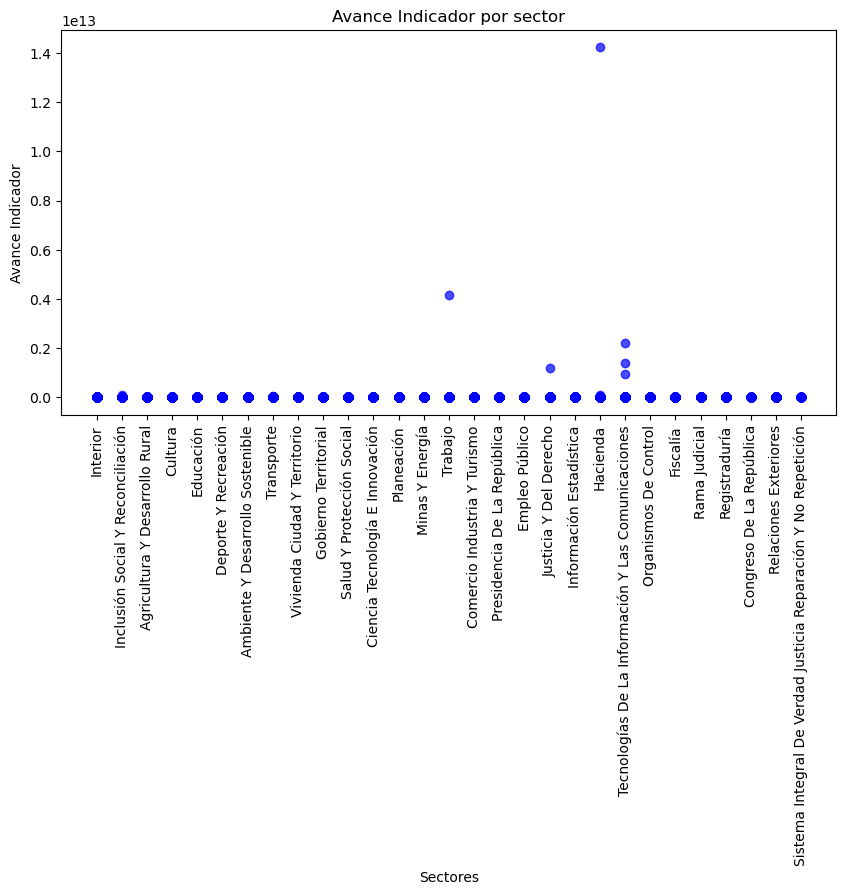

In [43]:
import matplotlib.pyplot as plt
import pandas as pd 


df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep = ',')

sectores = df_DNP['Sector'].tolist()
df_Avance_Indicador = df_DNP['AvanceIndicador'].tolist()

fig, ax = plt.subplots()
ax.scatter(sectores, df_Avance_Indicador, alpha=0.7,color='b')
ax.set_title('Avance Indicador por sector')
ax.set_xlabel('Sectores')
ax.set_ylabel('Avance Indicador')
fig.set_size_inches(10, 5) 
plt.xticks(rotation=90)
plt.show()